#### <span style='color:Blue'> **Project Overview:**</span>
> **By Xuyang Ji**

In the online retail industry, comprehending customer churn has emerged as a fundamental aspect for e-commerce enterprises striving to augment customer retention and satisfaction. Customer churn denotes the rate at which customers discontinue their association with a company, either by switching to a competitor or ceasing their purchases entirely. Through the analysis of customer churn, businesses can uncover crucial insights that empower the formulation of targeted strategies, ultimately mitigating churn and fostering enduring customer loyalty.

> **Project Objectives:**
- Identifying pivotal factors influencing customer churn to facilitate the implementation of targeted retention strategies.
- Understanding customer behavior patterns correlated with churn to enable the development of approaches aimed at enhancing customer satisfaction and engagement.
- Providing actionable recommendations deried from data-driven insights.

> **Data Source: [Ecommerce Customer Churn Analysis and Prediction](https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction/data)**

The data set belongs to a leading online E-Commerce company, obtained from Kaggel. An online retail (E commerce) company wants to know the customers who are going to churn, so accordingly they can approach customer to offer some promos. The dataset contains 20 columns with a total of 5630 records containing information about customers of an e-commerce company.


#### <span style='color:Blue'> **Project Structure**: </span> 

1. [**Exploratory Data Analysis:**](#####Exploratory-Data-Analysis)

- **Data Quality Assessment:** Addressing missing values and inconsistencies to ensure dataset quality.
- **Data Processing:** Transforming and structuring data to facilitate effective analysis.

2. [**Decoding Customer Patterns:**](#####Decoding-Customer-Patterns)

- **Variable Relationships:** Investigating correlations and interactions between key variables.
- **Behavioral Insights:** Uncovering patterns in customer behavior influencing purchasing decisions and loyalty, utilizing statistical and visual tools.

3. [**Churn Prediction Models:**](#####Churn-Prediction-Models)

- **Model Building:** Assessing performance of a series of machine learning models using ROC, manully tune the best performing model.
- **Model Selection:** Criteria include accuracy, precision, recall, and economic feasibility for the company.

4. [**Conclusions:**](#Conclusions)

- **Summary of Findings:** Highlighting key insights and their implications for the e-commerce company.
- **Future Directions:** Recommending areas for further research and ongoing enhancement in customer analytics.

##### <span style='color:Blue'> **I. Exploratory Data Analysis** </span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

customer= pd.read_excel('E Commerce Dataset.xlsx', sheet_name='E Comm')
customer.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


> **Dealing with Numeric Columns w/ Very Few Unique Values**

Running the example reports the column and the number of unique values for each column, followed by the percentage of unique values out of all rows in the dataset. Here, we can see that some columns have a very low percentage of unique values, such as below 0.1 percent. Perhaps the unique values can be encoded as ordinal values or as categorical values for analysis. 

In [2]:
uniqueVal= pd.DataFrame(columns=['colName', 'numUnique Values', 'PercentageUnique'])
for col in customer.select_dtypes(exclude='object').columns:
    numUnique=len(customer[col].unique())
    percentage= float(numUnique)/customer.shape[0]*100
    newRow=pd.Series({'colName':col, 'numUnique Values':numUnique,'PercentageUnique': percentage })
    uniqueVal=pd.concat([uniqueVal, newRow.set_axis(uniqueVal.columns).to_frame().T],axis=0)
uniqueVal['PercentageUnique']= uniqueVal['PercentageUnique'].map('{:,.3f}%'.format)
uniqueVal

,colName,numUnique Values,PercentageUnique
0,CustomerID,5630,100.000%
0,Churn,2,0.036%
0,Tenure,37,0.657%
0,CityTier,3,0.053%
0,WarehouseToHome,35,0.622%
0,HourSpendOnApp,7,0.124%
0,NumberOfDeviceRegistered,6,0.107%
0,SatisfactionScore,5,0.089%
0,NumberOfAddress,15,0.266%
0,Complain,2,0.036%


> **Converting Appropriate Columns to Ordinal/Categorical Data Type For Exploratory Analysis**

By converting appropriate columns to categorical or ordinal data types, businesses can gain deeper insights into customer behavior and preferences. This enables more accurate segmentation, targeting, and personalized marketing strategies, ultimately leading to improved customer satisfaction and retention.

From the output, columns like 'Churn', 'Complain', 'CityTier', and 'SatisfactionScore' have less than 10 unique values but identified as numeric variables and are highlighted in pink. It suggests that these columns may represent categorical or ordinal variables, which are often crucial for segmenting and analyzing customer behavior.

In [3]:
def categoryCol(row, color='pink'):
    attr= 'background-color: {}'.format(color)
    if row.Num_Unique_Values <10 and row.Data_Type != 'object':
        return [attr]*len(row)
    else:
        None
        
unique_counts = pd.DataFrame.from_records([(col, customer[col].dtype, customer[col].nunique()) for col in customer.columns],
                          columns=['Column_Name','Data_Type', 'Num_Unique_Values']).sort_values(by=['Num_Unique_Values'])
unique_counts.style.apply(categoryCol, axis=1)

,Column_Name,Data_Type,Num_Unique_Values
1,Churn,int64,2
14,Complain,int64,2
7,Gender,object,2
3,PreferredLoginDevice,object,3
4,CityTier,int64,3
12,MaritalStatus,object,3
11,SatisfactionScore,int64,5
9,NumberOfDeviceRegistered,int64,6
10,PreferedOrderCat,object,6
8,HourSpendOnApp,float64,6


After converting appropriate variables into categorical for exploratory analysis, the following dataframe aids in the data cleaning process by systematically analyzing and summarizing the nature and distribution of categorical variables. 

> **Dealing with data duplication issues:**
- The "phone" and "mobile phone" levels in the variable "LoginDevice" are assumed to be the same in this context.
- The CC and COD categories appear to represent Credit Card and Cash On Delivery.

In [4]:
for col in customer:
    if col in ['Churn','Complain','CityTier','SatisfactionScore','NumberOfDeviceRegistered']:
        customer[col]= customer[col].astype('object')
cusCat= customer.select_dtypes(exclude=np.number)    
pd.set_option('max_colwidth', None)
cusCat_df = pd.DataFrame.from_records([(col, cusCat[col].dtype, cusCat[col].nunique(), cusCat[col].unique().tolist()) for col in cusCat.columns],
                          columns=['Column_Name','Data_Type', 'Num_Unique_Values', 'Unique Values']).sort_values(by=['Num_Unique_Values'])
cusCat_df

,Column_Name,Data_Type,Num_Unique_Values,Unique Values
0,Churn,object,2,"[1, 0]"
4,Gender,object,2,"[Female, Male]"
9,Complain,object,2,"[1, 0]"
1,PreferredLoginDevice,object,3,"[Mobile Phone, Phone, Computer]"
2,CityTier,object,3,"[3, 1, 2]"
8,MaritalStatus,object,3,"[Single, Divorced, Married]"
7,SatisfactionScore,object,5,"[2, 3, 5, 4, 1]"
5,NumberOfDeviceRegistered,object,6,"[3, 4, 5, 2, 1, 6]"
6,PreferedOrderCat,object,6,"[Laptop & Accessory, Mobile, Mobile Phone, Others, Fashion, Grocery]"
3,PreferredPaymentMode,object,7,"[Debit Card, UPI, CC, Cash on Delivery, E wallet, COD, Credit Card]"


In [5]:
#Mobile phone, mobile, and phone are both same, so merged 
cusCat.loc[cusCat['PreferredLoginDevice']== 'Phone', 'PreferredLoginDevice'] = 'Mobile Phone'
cusCat.loc[cusCat['PreferedOrderCat']== 'Mobile', 'PreferedOrderCat'] = 'Mobile Phone'
#Replacing cod with Cash on Delivery
cusCat['PreferredPaymentMode']= np.where(cusCat['PreferredPaymentMode']== 'COD', 'Cash on Delivery', cusCat['PreferredPaymentMode'])
#Replacing cc with Credict card using lambda function 
cusCat['PreferredPaymentMode']= cusCat['PreferredPaymentMode'].apply(lambda x: 'Credit Card' if x=='CC' else x)
#merged back to the customer dataset 
customer.update(cusCat, join='left', overwrite= True)

In [6]:
#verify the original dataset is updated
print(customer['PreferredLoginDevice'].unique().tolist())
print(customer['PreferredPaymentMode'].unique().tolist())

['Mobile Phone', 'Computer']
['Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet']


<div class="alert alert-block alert-info">
<b><center>Exploratory Analysis For Categorical Variables vs. Churn Rate</center></b> 

><b>Device Preference and Churn Rate</b>: 
Customers who prefer logging in via computer exhibit a slightly elevated churn rate compared to those who prefer mobile phones, while mobile users demonstrate a higher retention rate. This could be due to varying user experiences or functionalities across devices, impacting customer satisfaction and retention.

><b>City Tier and Churn Rate</b>:
Tier 1 city customers show the highest retention and lowest churn rates, with an inverse trend as city tier increases. Tier 1 cities might offer better infrastructure, services, and connectivity, fostering stronger customer loyalty compared to lower-tier cities.

><b>Preferred Payment Method and Churn Rate</b>:
Customers favoring debit cards, credit cards, and UPI exhibit lower churn rates compared to those preferring cash on delivery or e-wallets. Payment method preferences might reflect varying levels of trust, convenience, or financial stability, impacting customer commitment to the platform.

> <b>Gender and Churn Rate</b>:
Despite a higher proportion of male customers, they show a slightly higher churn rate compared to females. Gender-based differences in shopping habits, preferences, or responsiveness to marketing efforts might contribute to this trend. It also make sense since tech products contribute the most to the company's sales. 

> <b>Number of Device Registered</b>:
While most customers has registered 3 or 4 devices, those who has 4 or less registered devices has lower churn rate than those who has more than 4 registered devices. Customers who has the highest number of devices registered have the highest churn rate. Managing multiple devices might lead to increased complexity or decreased satisfaction, impacting customer loyalty and retention.

> <b>Prefered Order Category and Churn rate</b>: 
E-commerce revenue is primarily driven by laptop and accessories sales, correlating with lower churn rates. On the other hand, customers who prefer to buy mobile phones has the highest churn rate, followed by those who prefer to buy fashion category. Preferences for certain product categories might indicate varying levels of interest or commitment, influencing customer retention.

> <b>Satisfaction Stores</b>:
Customers rating the platform as 3-star dominate, with higher satisfaction scores correlating with higher churn rates. Elevated churn rates among highly satisfied customers suggest unmet expectations or dissatisfaction with certain aspects of the service. As a suggestion, the company should develop targeted customer retention strategies that address the high churn rate among satisfied customers. This might include loyalty programs, personalized marketing, or new service features.
- Interestly, customer who has higher satisfication store tend to have a higher churn rate, as those who rated 5 has the highest churn rate of 24%. 

> <b>Marital Status</b>:
Single customers exhibit the highest churn rates, while married couples show the lowest. Differences in lifestyle, financial stability, or purchasing behavior between marital statuses may impact long-term engagement with the platform.

> <b>Complaint</b>:
Customers who lodge complaints about their orders have a significantly higher churn rate by 21%. Unresolved issues or poor customer service experiences can erode trust and loyalty, prompting customers to seek alternatives.

In [7]:
def barPerc(xVar,hueBars,ax):
    numX=xVar.nunique()
    bars = ax.patches
    for ind in range(numX):
        hueBars=bars[ind:][::numX]
        total = sum([x.get_height() for x in hueBars])
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center")

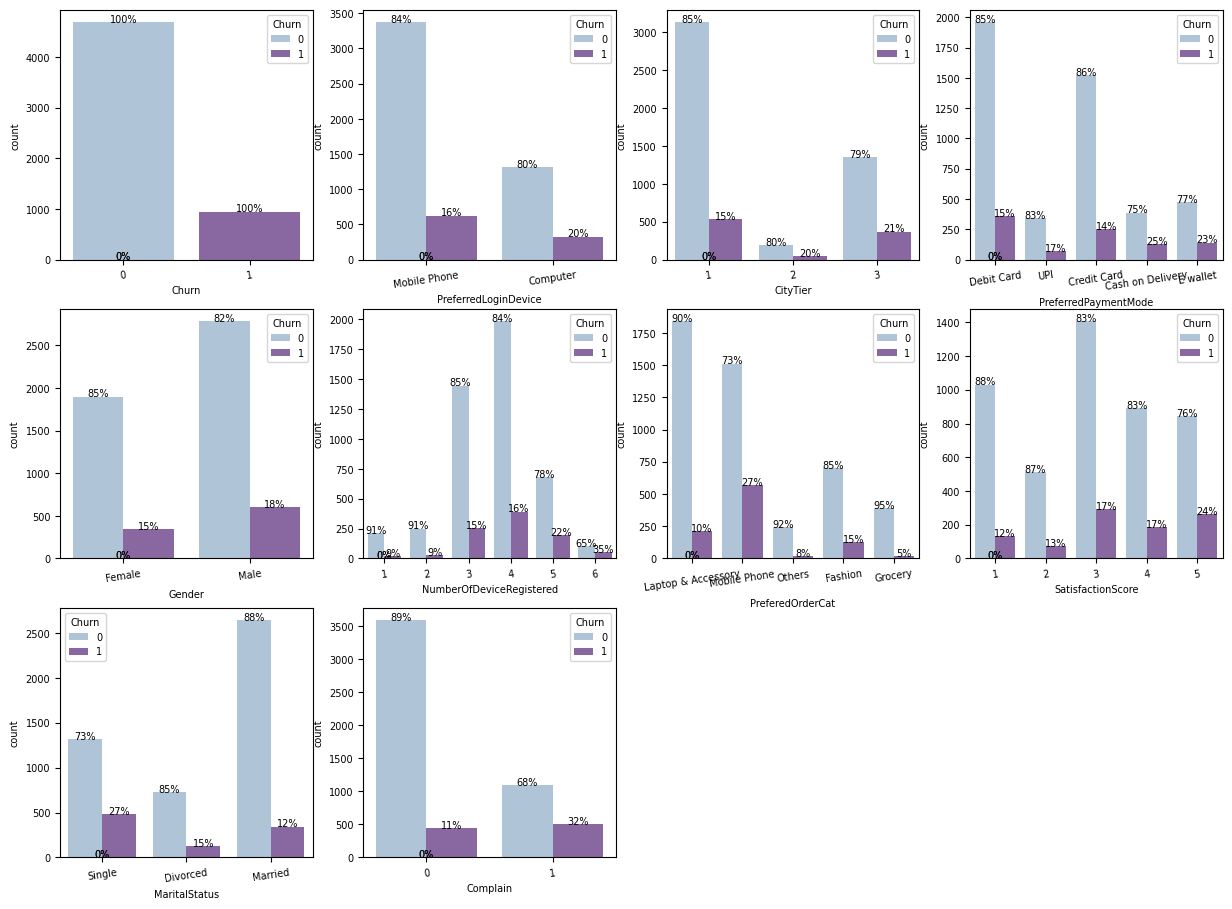

In [8]:
plt.rcParams.update({'font.size': 7})
fig, axes= plt.subplots(nrows=3,ncols=4, figsize=(15,11))
for i, subplots in zip(cusCat, axes.flatten()):
    g=sns.countplot(x=cusCat[i], hue= cusCat['Churn'], ax= subplots, palette='BuPu')
    # for c in g.containers:
    #     labels = [f'{h/cusCat.Churn.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    #     g.bar_label(c, labels=labels, label_type='edge')
    barPerc(cusCat[i],'Churn',g)
    g.tick_params(axis='x',rotation=8.5)
for subplots in axes.flatten()[len(cusCat.columns):]:
    subplots.remove()
plt.show()

<div class="alert alert-block alert-info">
<center><b>Exploratory Analysis For Numeric Variables vs. Churn Rate</b> </center></div>

><b>Tenure vs. Churn Rate</b>: 
The probability density plot reveals a strong relationship between customer tenure and churn rate, as the distribution of tenure for churned users is heavily skewed towards a lower tenure. Customers with longer tenures tend to exhibit lower churn rates, indicating that early engagement efforts and retention strategies may be crucial for newer customers to reduce churn. In addition, the company may not be recovering the initial customer acquisition costs and may be facing a high opportunity cost by missing opportunities for cross-selling and upselling.

> <b>Hour Spend on Apps and Churn Rate</b>:
As the plot shown, there is a 0% churn rate for customers who spend 0, 1, and 5 hours on the app. This could indicate either a very small number of users in these categories or exceptionally high retention for these groups. It suggests a relationship between app usage duration and churn rate, with higher churn rates observed for customers spending 2 to 4 hours on the app. Understanding user engagement patterns in different time spans can inform strategies to enhance app experiences and reduce churn.

> <b>Coupon Usage and Order Count vs.Churn Rate</b>:
While the churn rate does not consistently correlate with coupon usage frequency, a higher order count generally indicates lower churn rates. Investigating the reasons behind peaks in churn rates for users with fewer orders can provide valuable insights into retention strategies.

> <b>Cashback Count and Churn rate</b>:
The relationship between cashback amounts and churn behavior suggests that more generous cashback offers may contribute to higher customer retention, particularly for amounts above $200.

> <b>Days Since Last Order</b>:
Customers who have recently made an order exhibit a significantly higher churn rate, which decreases as the duration since the last order increases. Engaging customers shortly after placing an order can be critical in reducing churn, with strategies aimed at retaining customers during the immediate post-order period proving effective.

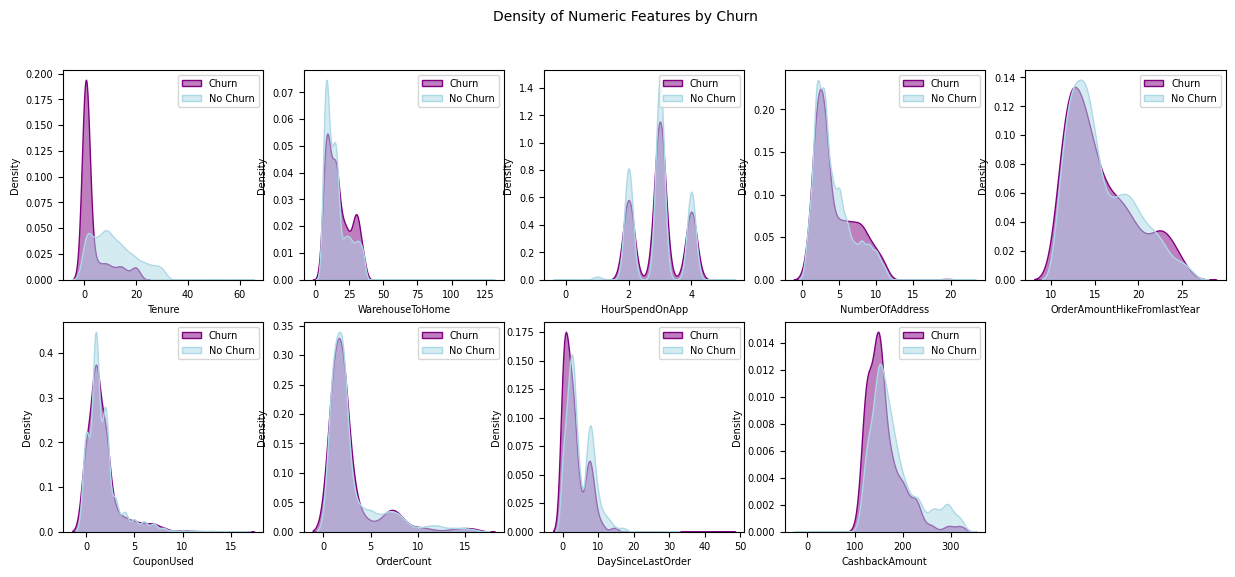

In [9]:
cusC, cusNC= customer[customer['Churn']==1].copy(), customer[customer['Churn']==0].copy()
fig, ax = plt.subplots(2,5,figsize=(15, 6))
fig.suptitle('Density of Numeric Features by Churn', fontsize=10)
ax = ax.flatten()
num_cols= customer.select_dtypes(include=np.number).columns.tolist()[1:]
for idx,c in enumerate(num_cols):
    sns.kdeplot(cusC[c], label = 'Churn',ax=ax[idx],color='purple', fill= True, alpha=.5)
    sns.kdeplot(cusNC[c], label = 'No Churn',ax=ax[idx],color='lightblue', fill=True, alpha=.5)
    ax[idx].legend(loc='upper right')
numCus= customer.select_dtypes(include=np.number) 
for subplots in ax[9:]:
    subplots.remove()

plt.show()

> **Assessment & Dealing with Missing Values with MissForest Imputation**

If duplicated row existed: False


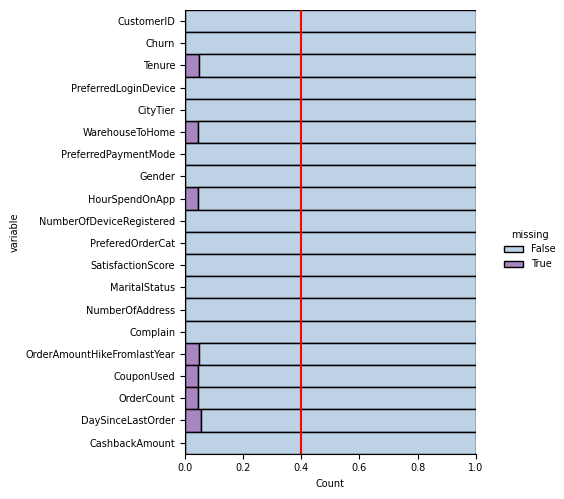

In [10]:
print('If duplicated row existed:',customer.duplicated().any())
plt.rcParams.update({'font.size': 7})
sns.displot(
    data=customer.isna().melt(value_name='missing'),
    y='variable',
    hue='missing',
    multiple='fill',
    palette='BuPu'
)
# specifying a threshold value
plt.axvline(0.4, color='r')
plt.show()

Miss Forest is used as it copes with both continuous and discrete attributes very well. It initially imputes all missing data using the “Mean-Median-Mode Imputaion” or “Random Sampling Imputation”, then for each attribute with missing entries, Miss Forest fits a random forest on the observed part and then predicts the missing part. The plot result can verify Miss Forest traces closer to the original data. Although K-nearest neighbor model is also popular for missing values, by finding the samples in the training set “closest” to it and averages these nearby points to fill in the value,  it's prone to outliers and can only work on numeric datasets. 

In [12]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

#lebel the missing data with mean-median-mode
def add_label(data, attr, name_notnan='Training',name_nan='Predict'):
    #getting the position of the null val for column
    nullPos= data[attr][data[attr].isnull()].index
    data['Label']= name_notnan
    #identify row with missing values, need to be predicted
    data.iloc[nullPos, data.columns.get_loc('Label')]= name_nan

def mean_median_imputer(data, kind='mean'):
    if kind=='mean':
        #getting the mean avoiding null values
        return data.fillna(np.mean(data.dropna()))
    elif kind=='median':
        return data.fillna(np.median(data.dropna()))

def mode_imputer(data):
    return data.fillna(stats.mode(data, keepdims= True))

def missForest(data, attrb, dtype):
    train, test= data[data['Label']=='Training'],data[data['Label']=='Predict'] 
    Y, X= data[attrb], data.drop(['Label', attrb], axis=1)
    y_train, y_test= train[attrb], test[attrb]
    x_train, x_test= train.drop(['Label', attrb], axis=1), test.drop(['Label', attrb], axis=1)
    if dtype=='continious':
        model= RandomForestRegressor(random_state=61)
        model.fit(x_train,y_train)
    elif dtype=='categorical':
        model=RandomForestClassifier(random_state=61)
        model.fit(x_train,y_train)
    y_pred= model.predict(x_test)
    return y_pred, Y[data['Label']=='Predict'].index

In [13]:
data= pd.get_dummies(customer)
#getting the colnames of nonNull attribute
not_null_attr= data.isnull().sum()[data.isnull().sum()==0].index
null_attr= data.isnull().sum()[data.isnull().sum()!=0].index

/Users/celine/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


,Tenure,WarehouseToHome,HourSpendOnApp,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder
0,4.0,6.0,3.0,11.0,1.0,1.0,5.0
1,NaN,8.0,3.0,15.0,0.0,1.0,0.0
2,NaN,30.0,2.0,14.0,0.0,1.0,3.0
3,0.0,15.0,2.0,23.0,0.0,1.0,3.0
4,0.0,12.0,NaN,11.0,1.0,1.0,3.0
...,...,...,...,...,...,...,...
5625,10.0,30.0,3.0,18.0,1.0,2.0,4.0
5626,13.0,13.0,3.0,16.0,1.0,2.0,NaN
5627,1.0,11.0,3.0,21.0,1.0,2.0,4.0
5628,23.0,9.0,4.0,15.0,2.0,2.0,9.0


In [15]:
data= pd.get_dummies(customer)
date= data.drop('CustomerID', inplace=True, axis=1)
#getting the colnames of nonNull attribute
not_null_attr= data.isnull().sum()[data.isnull().sum()==0].index
null_attr= data.isnull().sum()[data.isnull().sum()!=0].index
attrbs={}
for i in null_attr:
    df= pd.concat((data[not_null_attr],data[i]), axis=1)
    add_label(df,i)
    if i in ['Tenure','WarehouseToHome', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'HourSpendOnApp',
       'DaySinceLastOrder']:
        df[i]= mean_median_imputer(df[i], kind='mean')
        for job in range(5):
            value, index= missForest(df, i, dtype='continious')
            df.iloc[index, df.columns.get_loc(i)]= value
            #df[i].iloc[index]= value
    else:
        df[i]=mode_imputer(df[i])
        for job in range(5):
            value, index= missForest(df, i, dtype='categorical')
            df.iloc[index, df.columns.get_loc(i)]= value
            #df[i].iloc[index]= value
    attrbs[i]=df[i]

/Users/celine/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


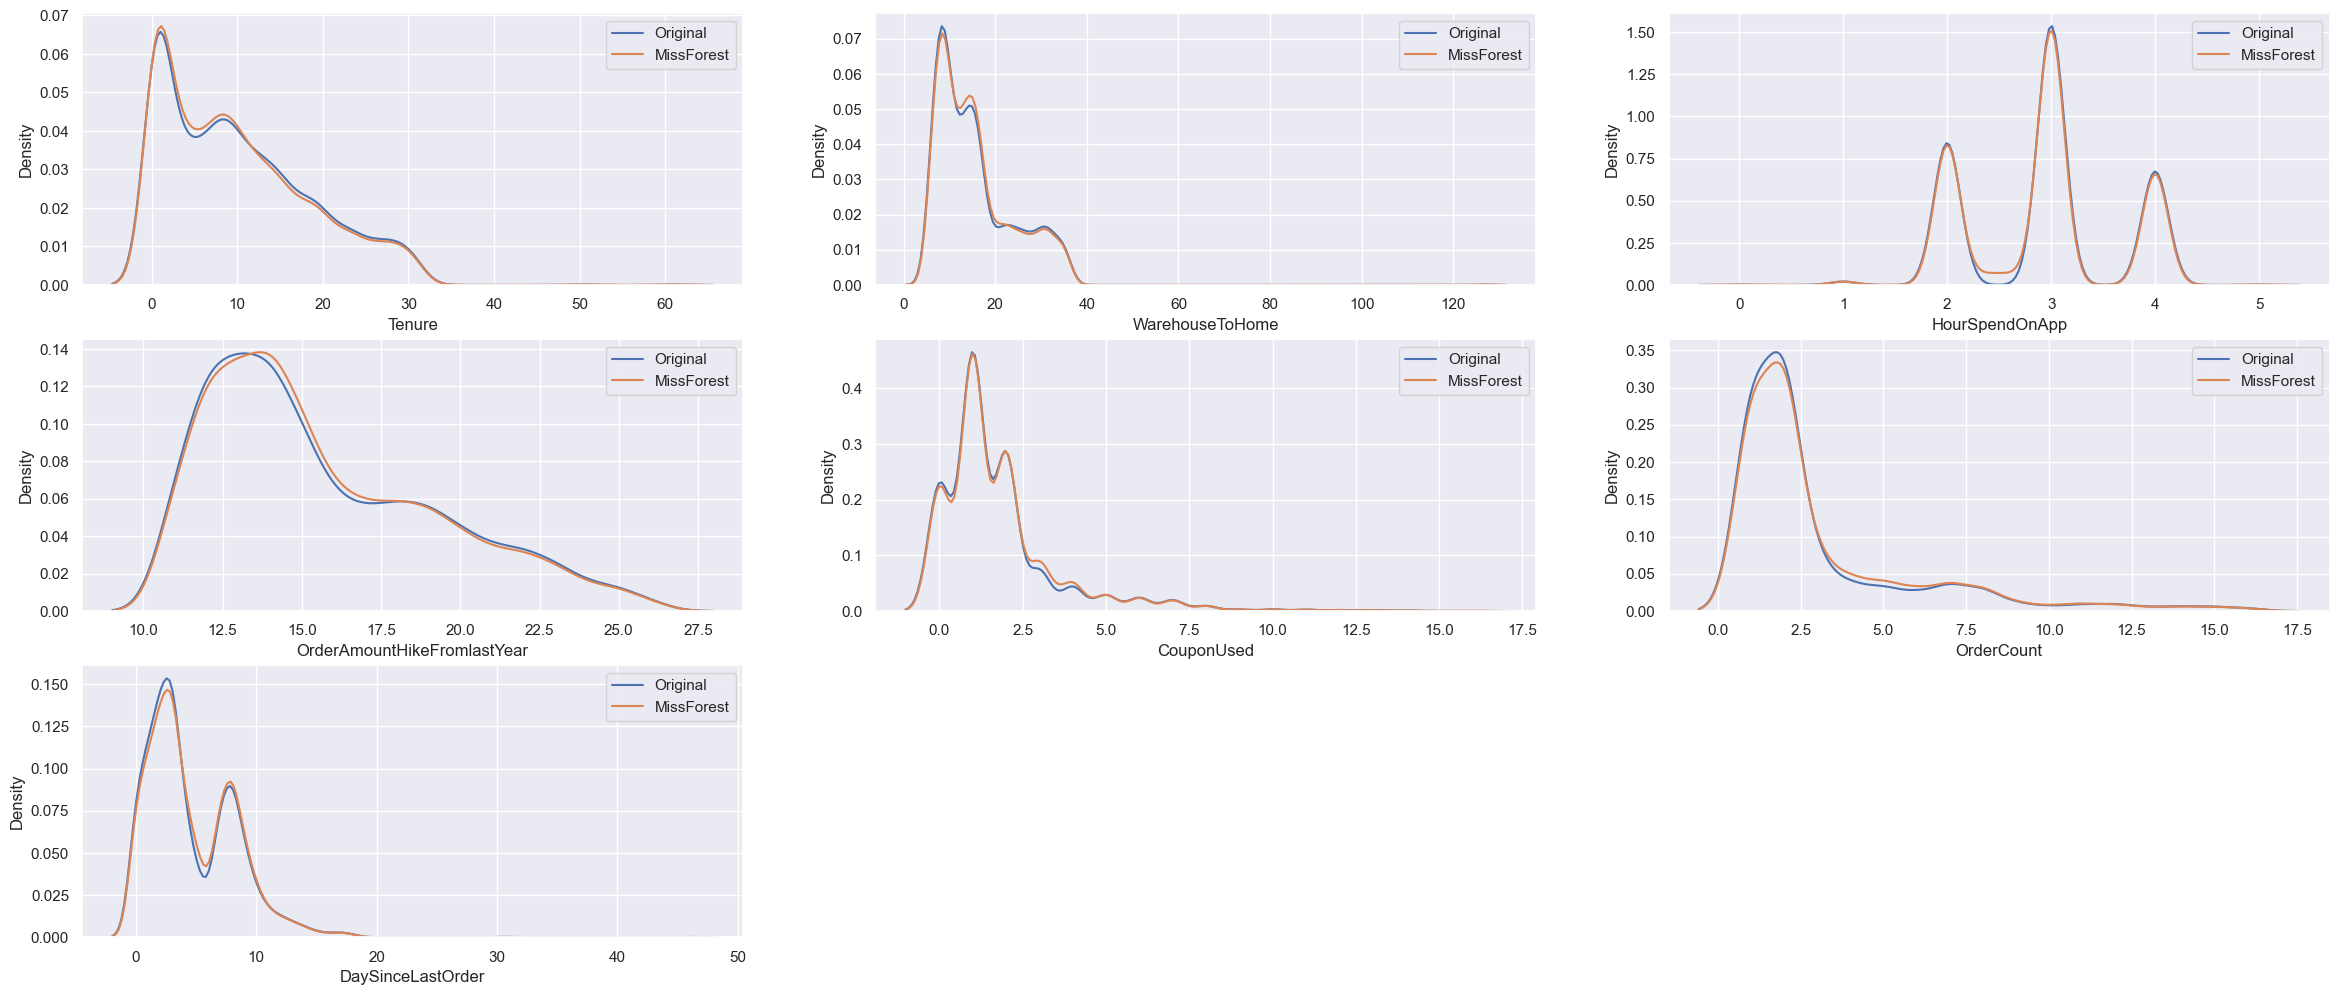

In [16]:
customerFull= customer.copy()
customerFull.drop(null_attr, axis=1, inplace=True)
customerFull= pd.concat((customerFull, pd.DataFrame(attrbs)), axis=1)
sns.set(style='darkgrid')
fig,ax = plt.subplots(figsize=(29,12),nrows=3, ncols=3)
for col,i,j in zip(null_attr,[0,0,0,1,1,1,2],[0,1,2,0,1,2,0]):
    sns.kdeplot(x = customer[col], label= 'Original', ax=ax[i][j] )
    sns.kdeplot(x = customerFull[col], label = 'MissForest', ax=ax[i][j] )
    ax[i][j].legend()
for subplots in ax.flatten()[len(null_attr):]:
    subplots.remove()

##### <span style='color:Blue'>**II. Decoding Customer Patterns** </span>

> **Most Common Cstomer Profile**

The data visualization illustrates several key insights regarding user behavior and preferences within the e-commerce platform. Firstly, it reveals that the predominant mode of login is via mobile phones, and there is a notable preference for debit card payments among users. Additionally, male users emerge as the most prevalent demographic within the dataset, and mobile phone stand out as the most sought-after product category. Moreover, a significant proportion of customers are identified as married individuals.

Based on these observations, it is evident that the e-commerce company can refine its marketing strategies and enhance user experiences by capitalizing on these trends. Specifically, prioritizing mobile phone users by offering tailored promotions for debit card payments could potentially drive engagement and transactions. Furthermore, targeted marketing campaigns aimed at male customers, particularly those interested in phone, can help bolster sales and customer satisfaction. Lastly, recognizing the substantial presence of married individuals among the user base suggests an opportunity to tailor marketing efforts to resonate with this demographic, potentially by introducing specialized deals or products designed to appeal to married couples. By leveraging these insights, the e-commerce company can optimize its marketing initiatives and foster stronger connections with its diverse user base.

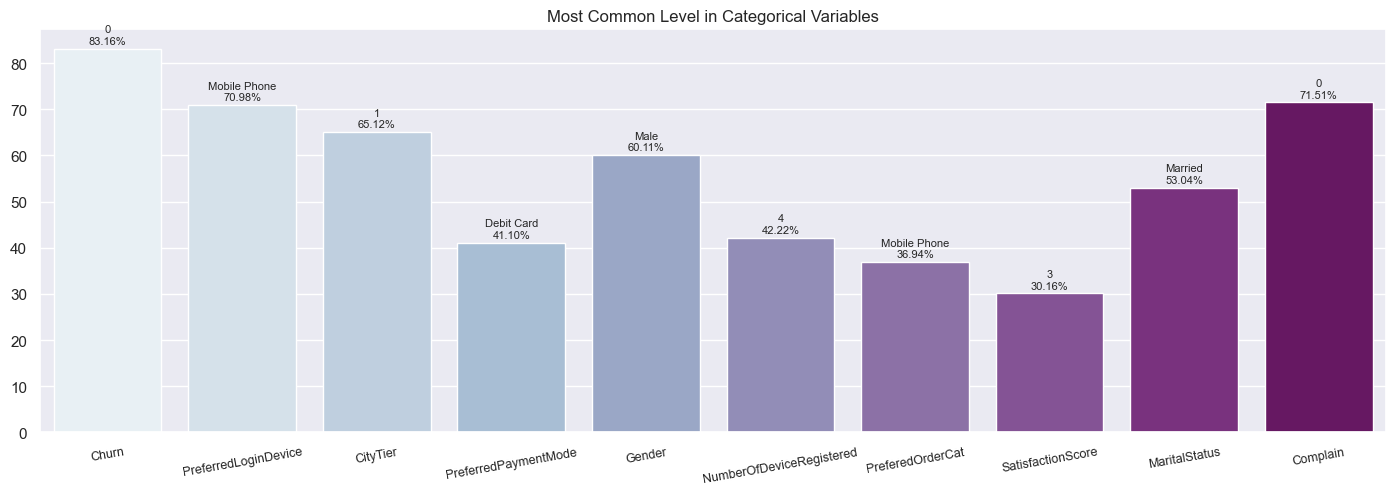

In [33]:
profile=[]
for var in customerFull.select_dtypes(include='object'):
    count=customerFull[var].value_counts()
    most_comm_level = count.index[0]
    percentage = (count.iloc[0] / len(data)) * 100
    profile.append({'Variable': var, 'Most_Common_Level': most_comm_level, 'Percentage': percentage})
profile_df = pd.DataFrame(profile)

# Creates a barplot
plt.figure(figsize=(14, 5))
plt.rcParams.update({'font.size': 8})
ax = sns.barplot(x='Variable', y='Percentage', data=profile_df, palette='BuPu', hue='Variable',legend=False)
ax.set(xlabel=None, ylabel=None)
plt.title('Most Common Level in Categorical Variables')
for i, row in profile_df.iterrows():
    level = row['Most_Common_Level']
    percentage = row['Percentage']
    ax.text(i, percentage + 1, f'{level}\n{percentage:.2f}%', ha='center')
plt.xticks(rotation=10, fontsize=9)
plt.tight_layout()
plt.show()


> **Relationship between the preferred login device and the time the customer spends on the app:**

The usage pattern within the app appears to be consistent across both mobile phones and computers for churned and unchurn customers, suggesting that the choice of device may not significantly impact marketing or user retention strategies. However, it is noteworthy that a considerable number of users spend 2-3 hours on the app. This presents an opportunity for the company to potentially enhance user engagement by introducing new features or delivering personalized content tailored to individual preferences.

Additionally, the analysis reveals the presence of outliers within the data. These outliers could stem from various factors such as data errors, instances where customers accessed the app only once and immediately logged out, or users exhibiting low engagement levels. Regardless of the underlying cause, it is prudent to ascertain the relevance of these outliers, as they may indicate underlying issues with the application's functionality.

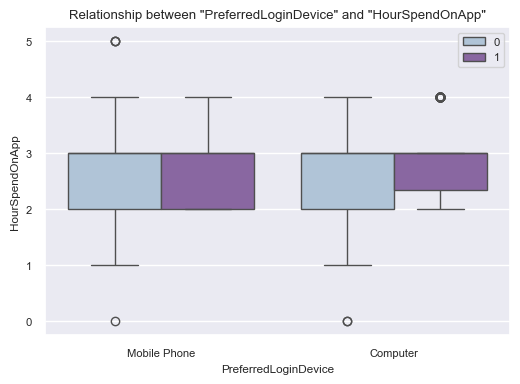

In [60]:
plt.figure(figsize=(6, 4))
plt.rcParams.update({'font.size': 8})
sns.boxplot(x="PreferredLoginDevice", y="HourSpendOnApp", data=customerFull, hue='Churn', palette='BuPu')
plt.tick_params(axis='both', labelsize=8)
plt.title('Relationship between "PreferredLoginDevice" and "HourSpendOnApp"', fontsize=9.5)
plt.xlabel("PreferredLoginDevice", fontsize=8.5)
plt.ylabel("HourSpendOnApp", fontsize=8.5)
plt.legend(fontsize=8)
# Shows the plot 
plt.show()


> **Relationship between the percentage increases in order from last year and the city tier:**

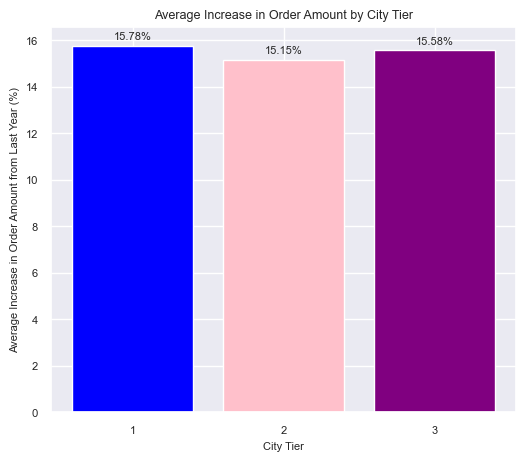

In [62]:
avg_increase = customerFull.groupby('CityTier')['OrderAmountHikeFromlastYear'].mean().reset_index()
plt.figure(figsize=(6, 5))
bars = plt.bar(avg_increase['CityTier'], avg_increase['OrderAmountHikeFromlastYear'], color=['blue','pink','purple'])
plt.xlabel('City Tier', fontsize=8)
plt.ylabel('Average Increase in Order Amount from Last Year (%)', fontsize=8)
plt.title('Average Increase in Order Amount by City Tier', fontsize=9)
plt.xticks([ 1, 2, 3], ['1', '2', '3'])

# Bars with their respective percentages
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}%',  
                 xy=(bar.get_x() + bar.get_width() / 2, height),xytext=(0, 3),  
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.show()

> **Relationship between preferred order category and any complain raised in last month**

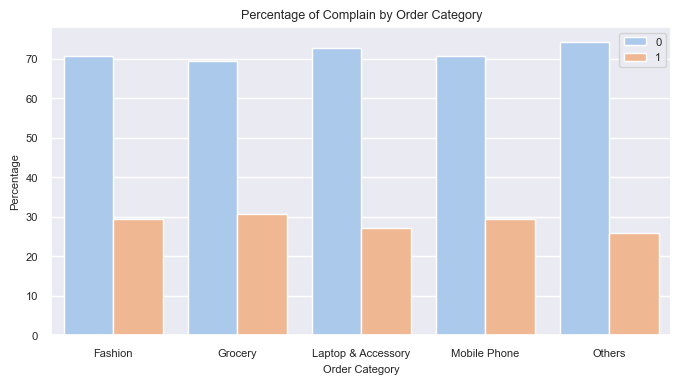

In [69]:
counts= customerFull.groupby(['PreferedOrderCat','Complain']).size().unstack()
counts = counts.divide(counts.sum(axis=1), axis=0) * 100
counts = counts.stack().reset_index(name='Percentage')
plt.figure(figsize=(8, 4))
sns.barplot(x='PreferedOrderCat', y='Percentage', hue='Complain', data=counts, palette='pastel')
plt.title('Percentage of Complain by Order Category', fontsize=9)
plt.xlabel('Order Category', fontsize=8)
plt.ylabel('Percentage', fontsize=8)
plt.legend(fontsize=8)
plt.show()

> **Data Output**

In [70]:
for col in ['NumberOfDeviceRegistered', 'SatisfactionScore','CityTier']:
    customerFull[col]= customerFull[col].astype('float64')
customerFull= customerFull.drop('CustomerID', axis=1)

In [71]:
pd.DataFrame.from_records([(col, customerFull[col].dtype, customerFull[col].nunique()) for col in customerFull.columns],
                          columns=['Column_Name','Data_Type', 'Num_Unique_Values']).sort_values(by=['Num_Unique_Values'])

,Column_Name,Data_Type,Num_Unique_Values
0,Churn,object,2
1,PreferredLoginDevice,object,2
4,Gender,object,2
10,Complain,object,2
2,CityTier,float64,3
8,MaritalStatus,object,3
3,PreferredPaymentMode,object,5
6,PreferedOrderCat,object,5
7,SatisfactionScore,float64,5
5,NumberOfDeviceRegistered,float64,6


In [72]:
customerFull.to_pickle('./modifiedCus.pkl')